#### Topic:      Prework Solutions
#### Cohort:   03_Spring2015
#### Date:        01-Apr-2015
#### Author:     Reshama Shaikh

Prework: Required Exercises

https://github.com/datascopeanalytics/metis-data-science-bootcamp-prework/blob/master/exercises.md

Source:     Think Stats (section Using the Code), there is some accompanying code and data. You can get these from the Think Stats repository.
https://github.com/AllenDowney/ThinkStats2

------------------------------------------------------------------------------- 

####Note:

Step1.  Create a directory on your computer.  Below is an example:

/Users/reshamashaikh/ds/metis/metisgh/

Step2.  use GitHub to pull this repo to your computer

git clone https://github.com/AllenDowney/ThinkStats2.git

Step3.  Put your ipython notebook in this directory (that way, it can pull the needed dependencies):  

/Users/reshamashaikh/ds/metis/metisgh/ThinkStats2/code/

(content will match:  https://github.com/AllenDowney/ThinkStats2/tree/master/code )

Step4.  Call your prework solutions notebook:  

0_S_Prework_myname.ipynb

##Table of Contents 
[Exercise01](#1) 

(Think Stats Ex 2.4) 

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?
 

[Exercise02](#2)

(Think Stats Ex 3.1) 

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.
Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb. This is an ipython notebook from the ThinkStats2 repository.


[Exercise03](#3)

(Think Stats Ex 4.2) 

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?



[Exercise04](#4)

(Think Stats Ex 7.1) 

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

[Exercise05](#5)

(Think Stats Ex 8.2)

Suppose that you draw a sample with size n = 10 from an exponential distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.


[Exercise06](#6)

(Think Stats Ex 2.1 Bayes)

The cookie problem is a problem discussed in sections 1.3, 2.2 and 2.3 of Think Bayes. Solve the following problem. In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.

Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.


-----------------------------------------------------------------------------------------

### <a id='1'></a> Exercise 1 
(Think Stats Ex 2.4)

a) Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. 

b) Compute Cohen’s d to quantify the difference between the groups. 

c) How does it compare to the difference in pregnancy length?

Note:  Cohen's d is an effect size used to indicate the standardised difference between two means. It can be used, for example, to accompany reporting of t-test and ANOVA results. 

In [3]:
# set working directory
path_data = "/Users/josephdziados/Documents/metis_ds/metisgh/ThinkStats2/code"

In [20]:
import nsfg
df = nsfg.ReadFemPreg()
print "Length of df: ", len(df)
df.head()

Length of df:  13593


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [21]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]
print "len of firsts: ", len(firsts)
print "len of others: ", len(others)

len of firsts:  4413
len of others:  4735


In [6]:
print "firsts total birth wt (mean): ", firsts.totalwgt_lb.mean()
print "others total birth wt (mean): ", others.totalwgt_lb.mean()

firsts total birth wt (mean):  7.20109443044
others total birth wt (mean):  7.32585561497


####Question: 1a) Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others.
####Answer:   
####First babies are lighter than others (7.20 vs 7.33 lbs)

In [10]:
#b) Compute Cohen’s D to quantify the difference between the groups. 

# Cohen's D function

import thinkstats2

def CohensD(grp1, grp2):
    return thinkstats2.CohenEffectSize(grp1, grp2)

    
   

####Answer:  

####Cohen's D is:  -0.0887

c) How does Cohen's D compare to the difference in pregnancy length? 

In [11]:
print "Cohen's D for birth weight is: " + str(CohensD(firsts.totalwgt_lb, others.totalwgt_lb))
print "Cohen's D for pregnancy length is:  " + str(CohensD(firsts.prglngth, others.prglngth))

Cohen's D for birth weight is: -0.0886729270726
Cohen's D for pregnancy length is:  0.0288790446544


####Interpretation
This site has a good interpretation of Cohen's D, effect size:
http://www.uccs.edu/lbecker/effect-size.html

The Cohen's d value for total weight is smaller than the difference between pregnancy length.  However, it is still too small to show a difference.  The value of -0.08 indicates there is a larger variation between babies' weights, thus a difference of 0.13 lbs when comparing the average weight of other babies to first babies does not show significance.

-------------------------------------------------------------------------------------------

### <a id='2'></a> Exercise 2 
(Think Stats Ex 3.1)

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb. This is an ipython notebook from the ThinkStats2 repository.

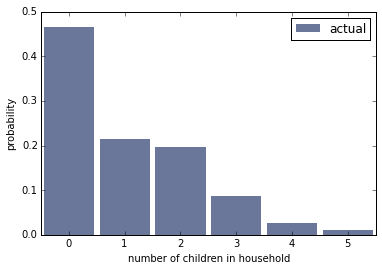

In [14]:
import chap01soln
import thinkplot
%matplotlib inline
from probability import BiasPmf
resp = chap01soln.ReadFemResp()

num_child = resp['numkdhh']
actual_child_pmf = thinkstats2.Pmf(num_child, label='actual')

thinkplot.Hist(actual_child_pmf)
thinkplot.Show(xlabel='number of children in household', ylabel='probability', axis=[-0.5,5.5,0,0.5])

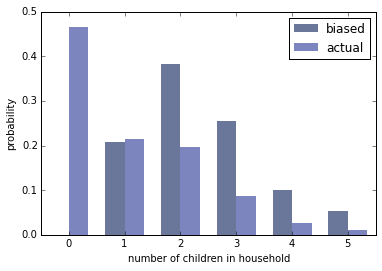

In [15]:
biased_child_pmf = BiasPmf(actual_child_pmf, 'biased')

thinkplot.Hist(biased_child_pmf, align='right',width=0.35)
thinkplot.Hist(actual_child_pmf, align='left', width=0.35)
thinkplot.Show(xlabel='number of children in household', ylabel='probability', axis=[-0.5,5.5,0,0.5])

In [16]:
actual_child_mean = actual_child_pmf.Mean()
biased_child_mean = biased_child_pmf.Mean()
print 'Actual household children mean: ' + str(actual_child_mean)
print 'Biased household children mean: ' + str(biased_child_mean)

Actual household children mean: 1.02420515504
Biased household children mean: 2.40367910066


-------------------------------------------------------------------------------------------

### <a id='3'></a> Exercise 3 
(Think Stats Ex 4.2)

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

/Users/josephdziados/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


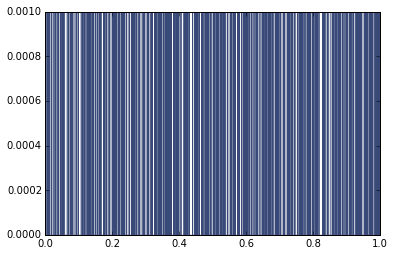

In [17]:
import thinkstats2
import random

dist = [random.random() for x in range(1000)]
dist_pmf = thinkstats2.Pmf(dist)
thinkplot.Pmf(dist_pmf, linewidth=0.2)
thinkplot.Show()

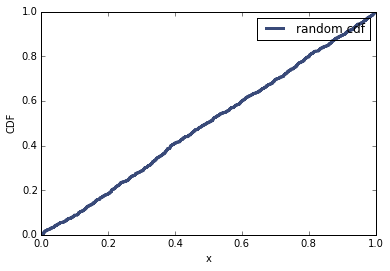

In [18]:
dist_cdf = thinkstats2.Cdf(dist, label='random cdf')
thinkplot.Cdf(dist_cdf)
thinkplot.Show(xlabel='x', ylabel='CDF')

####Answer:
Yes, distribution looks uniform

-------------------------------------------------------------------------------------------

### <a id='4'></a> Exercise 4 
(Think Stats Ex 7.1)

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

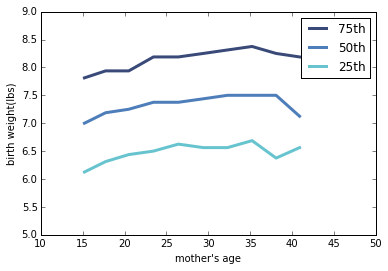

In [25]:
import nsfg
import numpy as np

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
live = live.dropna(subset=['totalwgt_lb', 'agepreg'])

def BinnedPercentiles(df):

    bins = np.arange(10,48,3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)
    thinkplot.Show(xlabel='mother\'s age', ylabel='birth weight(lbs)', axis=[10,50,5,9])
    
BinnedPercentiles(live)

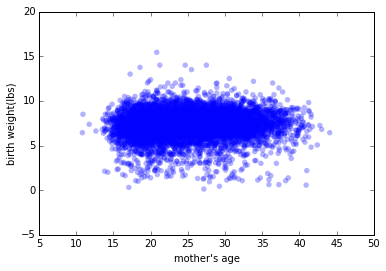

In [26]:
age, weight = live['agepreg'], live['totalwgt_lb']
thinkplot.Scatter(age, weight, alpha = 0.3)
thinkplot.Show(xlabel='mother\'s age', ylabel='birth weight(lbs)')

In [27]:
print 'Pearsons Correlation: ' + str(thinkstats2.Corr(age,weight))
print 'Spearman Correlation: ' + str(thinkstats2.SpearmanCorr(age,weight))

Pearsons Correlation: 0.0688339703541
Spearman Correlation: 0.0946100410966


####Answer:
For the Pearson r correlation, both variables should be normally distributed.  Other assumptions include linearity and homoscedasticity.  Linearity assumes a straight line relationship between each of the variables in the analysis and homoscedasticity assumes that data is normally distributed about the regression line.

Spearman rank correlation test does not make any assumptions about the distribution. 

####Conclusions:
Based on the evidence from the scatterplot, there does not appear to be a relationship between mother's age and birth weight.  This is confirmed with low Pearson and Spearman scores; the higher of the two, Spearman's, indicates potential outliers.  

-----------------------------------------------------------------------------------------

### <a id='5'></a> Exercise 5
(Think Stats Ex 8.2)

Suppose that you draw a sample with size n = 10 from an exponential distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.

In [28]:
import thinkstats2
import estimation

def SimulateSample(n, m):
    
    def VertLine(x, y=1):
        thinkplot.Plot([x,x], [0,y], color='0.8', linewidth=3)
        
    lmbd = 2
    
    means = []
    for i in range(m):
        samp = np.random.exponential(1.0 / lmbd, n)
        L = 1 / np.mean(samp)
        means.append(L)
    
    stderr = estimation.RMSE(means, lmbd)
    print 'Standard Error: ' + str(stderr)
        
    cdf = thinkstats2.Cdf(means, label='sample means')
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print 'Confidence Interval: ' + str(ci[0]) + ', ' + str(ci[1])
    VertLine(ci[0])
    VertLine(ci[1])
    
    thinkplot.Cdf(cdf)
    thinkplot.Show(xlabel='Sample Mean', ylabel='CDF', title='Sampling Distribution') 

Standard Error: 0.797663534142
Confidence Interval: 1.25499125091, 3.655298934


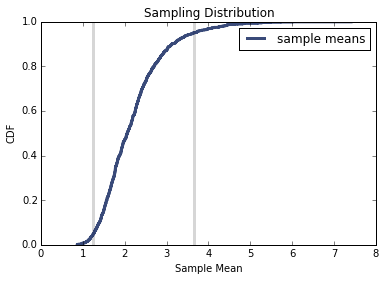

Standard Error: 0.206258665714
Confidence Interval: 1.72434976287, 2.37075804395


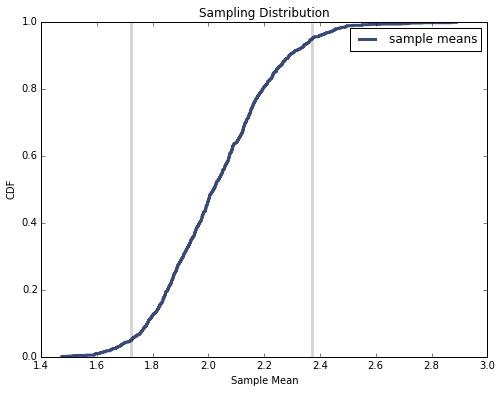

Standard Error: 0.0631156945251
Confidence Interval: 1.90062760987, 2.10465609401


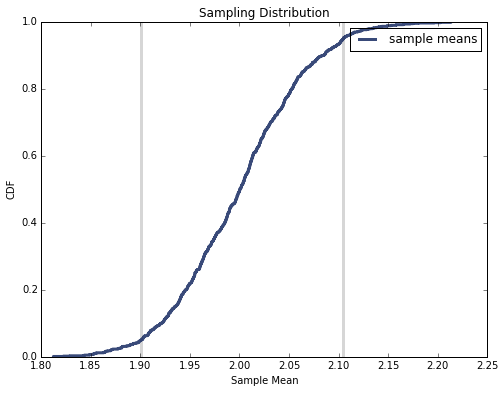

In [29]:
thinkplot.PrePlot(3)
SimulateSample(10, 1000)
SimulateSample(100, 1000)
SimulateSample(1000, 1000)

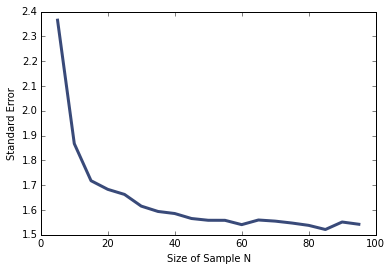

In [30]:
def SimulateSample2(n=10, m=1000):
        
    lmbd = 2
    
    means = []
    for i in range(m):
        samp = np.random.exponential(1.0 / lmbd, n)
        L = 1 / np.mean(samp)
        means.append(L)
    
    stderr = estimation.RMSE(means, 1.0 / lmbd)
    return stderr

stderrs = []
N = range(5,100,5)
for n in N:    
    stderr = SimulateSample2(n)
    stderrs.append(stderr)
thinkplot.Plot(N, stderrs)
thinkplot.Show(xlabel='Size of Sample N', ylabel='Standard Error')

-----------------------------------------------------------------------------------------

### <a id='6'></a> Exercise 6
(Think Stats Ex 2.1 Bayes)

The cookie problem is a problem discussed in sections 1.3, 2.2 and 2.3 of Think Bayes. Solve the following problem. In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.

Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.

In [90]:
# get this file from:  https://github.com/AllenDowney/ThinkBayes/blob/master/thinkbayes.py
from thinkbayes import Pmf

In [5]:
from thinkstats2 import Pmf

class Cookie(Pmf):
    """A map from string bowl ID to probablity."""

    def __init__(self, hypos):
        """Initialize self.

        hypos: sequence of string bowl IDs
        """
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
        self.bowl_1 = Bowl(30,10)
        self.bowl_2 = Bowl(20,20)
        self.bowls = {'Bowl 1': self.bowl_1, 'Bowl 2': self.bowl_2}

    def Update(self, data):
        """Updates the PMF with new data.

        data: string cookie type
        """
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()

    def Likelihood(self, data, hypo):
        """The likelihood of the data under the hypothesis.

        data: string cookie type
        hypo: string bowl ID
        """
        mix = self.bowls[hypo].getMix()
        like = mix[data]
        self.bowls[hypo].removeCookie(data)
        return like
    
class Bowl():
    """A bowl is dictionary containing the type of cookies as keys and the amount of each type as values."""
    
    def __init__(self, van, choc):
        self.van = van
        self.choc = choc
        self.bowl = {'vanilla': self.van, 'chocolate': self.choc}
        
    def getMix(self):
        """The mix of each type of cookie represented as a fraction of the total amount of cookies in the bowl."""
        
        total = sum(self.bowl.values())
        van_mix = float(self.bowl['vanilla']) / total
        choc_mix = float(self.bowl['chocolate']) / total
        return {'vanilla': van_mix, 'chocolate': choc_mix}
    
    def removeCookie(self, flavor):
        """Removes a cookie from the bowl depending on flavor.
        
        flavor:  string cookie type
        """
        self.bowl[flavor] = self.bowl[flavor] - 1
    
def main():
    
    hypos = ['Bowl 1', 'Bowl 2']

    pmf = Cookie(hypos)

    data = ['vanilla', 'chocolate', 'vanilla']
    for el in data:
        pmf.Update(el)

    for hypo, prob in sorted(pmf.Items()):
        print hypo, prob


if __name__ == '__main__':
    main()

Bowl 1 0.533742331288
Bowl 2 0.466257668712
